## Jinghao Yan
## ANLY 590 HW0

## Exercise 1.1

Use LASSO regression to predict Salary from the other numeric predictors (you should omit the categorical predictors). Create a visualization of the coefficient trajectories. Comment on which are the final three predictors that remain in the model. Use cross-validation to find the optimal value of the regularization penality. How many predictors are left in that model?

In [135]:
# ---- Loading libraries ----
# - Base libraries -
import os
import sys

# - Plotting libraries -
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Loading data
import pandas as pd

df = pd.read_csv('Hitters.csv', sep=",")

In [136]:
df1 = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,16,17,18,19]]

In [137]:
# Data cleaning

df1 = df1.rename(index=str, columns={"Unnamed: 0": "Name"})
df1['Name'] = df1['Name'].str.strip('-')
df1 = df1[np.isfinite(df1['Salary'])]

In [138]:
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV


x = df1.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,16]]
y = df1.Salary

C:\anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


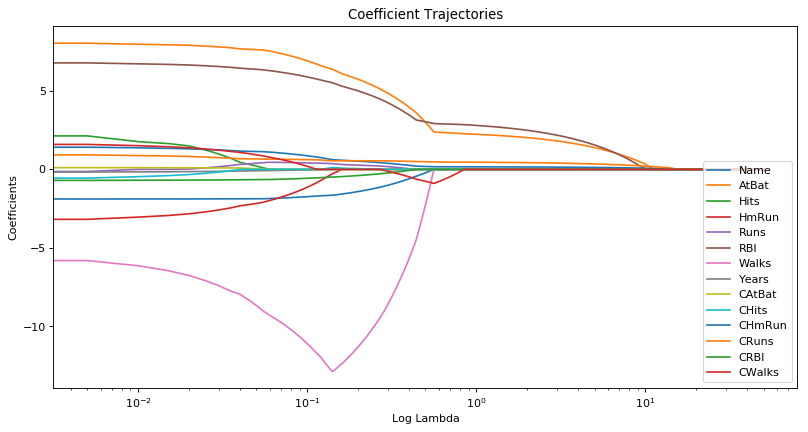

In [139]:
alphas_lasso = np.linspace(0,50,10000)
coeffs_lasso = []

for i in alphas_lasso:
    lasso = Lasso(alpha = i, max_iter = 10000, normalize = True)
    lasso.fit(x, y)
    coeffs_lasso.append(lasso.coef_)

figure(num=None, figsize=(12, 6), dpi=80)    
ax = plt.gca()
ax.plot(alphas_lasso, coeffs_lasso)

ax.legend(df1.columns.values,loc = 4)
#plt.xlim(-2,4)
#plt.ylim(-10,8)
ax.set_xscale('log')
plt.xlabel('Log Lambda')
plt.ylabel('Coefficients')
plt.title('Coefficient Trajectories')
plt.show()

Final three predictors appear to be Hits, CRuns, and RBI.

In [140]:
alphas_ = np.linspace(0,30,500)
lassocv = LassoCV(alphas = alphas_, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(x, y)
lasso.set_params(alpha=lassocv.alpha_)

print('Optimal value of regularization penalty: ', lassocv.alpha_)

C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Optimal value of regularization penalty:  0.18036072144288576


In [141]:
lassocv.fit(x,y)
pd.Series(lassocv.coef_, index=x.columns)

C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


AtBat     -1.491183
Hits       5.911549
HmRun      0.000000
Runs      -0.000000
RBI        0.288076
Walks      5.142644
Years    -11.827240
CAtBat    -0.000000
CHits      0.000000
CHmRun     0.059246
CRuns      0.549832
CRBI       0.549101
CWalks    -0.426691
Errors    -0.000000
dtype: float64

From this, it appears 9 columns are left, although there are 4-5 with relatively larger coefficients.

## Exercise 1.2

Repeat with Ridge Regression. Visualize coeffecient trajectories. Use cross-validation to find the optimal value of the regularization penalty.

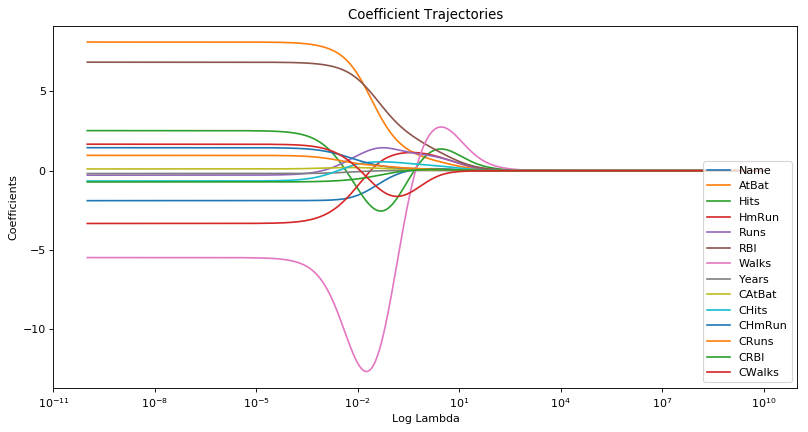

In [142]:
alphas_ridge = np.logspace(-10,10,10000)
coeffs_ridge = []

for j in alphas_ridge:
    ridge = Ridge(alpha = j,  max_iter = 10000, normalize = True)
    ridge.fit(x, y)
    coeffs_ridge.append(ridge.coef_)

figure(num=None, figsize=(12, 6), dpi=80)    
ax = plt.gca()
ax.plot(alphas_ridge, coeffs_ridge)

ax.legend(df1.columns.values,loc = 4)
#plt.xlim(-2,4)
#plt.ylim(-10,8)
ax.set_xscale('log')
plt.xlabel('Log Lambda')
plt.ylabel('Coefficients')
plt.title('Coefficient Trajectories')
plt.show()

In [143]:
alphas_ = np.logspace(-4, 4, 300)
ridgecv = RidgeCV(alphas = alphas_, cv = 10, normalize = True)
ridgecv.fit(x, y)
ridge.set_params(alpha=ridgecv.alpha_)

print('Optimal value of regularization penalty: ', ridgecv.alpha_)

Optimal value of regularization penalty:  0.8572556731909324


In [144]:
ridgecv.fit(x,y)
pd.Series(ridgecv.coef_, index=x.columns)

AtBat     0.105500
Hits      0.878411
HmRun     0.759945
Runs      1.092047
RBI       1.016365
Walks     1.755873
Years     1.490033
CAtBat    0.011259
CHits     0.055534
CHmRun    0.379131
CRuns     0.109001
CRBI      0.117067
CWalks    0.062994
Errors   -0.856858
dtype: float64

## Exercise 2

Short Answer. Explain in your own words the bias-variance tradeoff. What role does regularization play in this tradeoff? Make reference to your findings in number (1) to describe models of high/low bias and variance.

The bias-variance tradeoff represents a scenario where an increase in one variable's magnitude is associated with a decrease in the other variable's magnitude. Models with lower bias in parameter estimation tend to have higher variance and similarly, higher bias tend to be associated with lower variance. Regularization has the effect of reducing variance by introducing bias or vice versa. Models with different levels of flexibility have different balances of bias versus variance, depending on how it is implemented on the training data. The structure of the testing data will also determine its performance.

In LASSO regression, we introduced bias when we limited down the number of features. By shrinking down the coefficients of certain features, we lowered variability. On the other hand, in Ridge regression, we decreased bias since there are ultimately no coeffcients having a value of 0, and as a result, all of the features are present and the model has higher variability.